In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
city_path = os.path.join('city_data.csv')
ride_path = os.path.join('ride_data.csv')
city = pd.read_csv(city_path)
ride = pd.read_csv(ride_path)
print(city.columns)
print(ride.columns)

# Merging the two data frames
combined_data = pd.merge(city, ride, on="city")
combined_data.head()


Index(['city', 'driver_count', 'type'], dtype='object')
Index(['city', 'date', 'fare', 'ride_id'], dtype='object')


,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [3]:
# Average Fare ($) Per City

#grouped by city
grouped_city = ride.groupby(['city'])

# Converting a GroupBy object into a Series
avg_fare = grouped_city['fare'].mean()
avg_fare_df = pd.DataFrame(grouped_city["fare"].mean())
avg_fare_df.head().round()


,fare
city,
Alvarezhaven,24.0
Alyssaberg,21.0
Anitamouth,37.0
Antoniomouth,24.0
Aprilchester,22.0


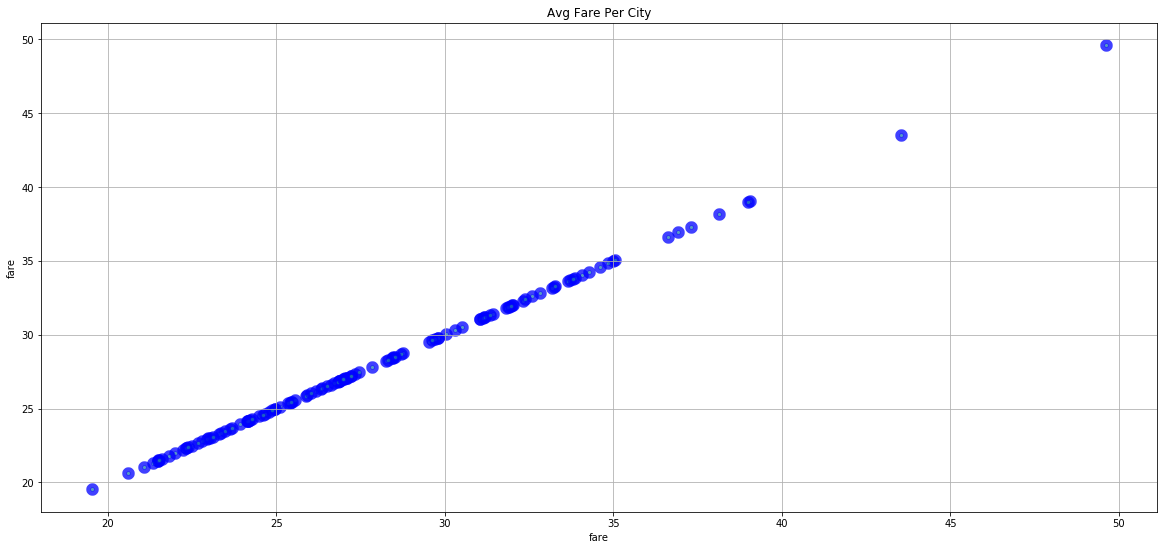

In [26]:
# Creating a scatter plot
avg_fare_df.plot(kind="scatter", x="fare", y="fare", edgecolor="b",alpha=0.75, grid=True,figsize=(20,9),linewidths=8,
              title="Avg Fare Per City")
plt.show()

In [5]:
# Total Number of Rides Per City

#grouped by city
grouped_city = ride.groupby(['city'])

# Converting a GroupBy object into a Series
totalrides_df = grouped_city["ride_id"].count()
totalrides_df = pd.DataFrame(grouped_city["ride_id"].count())
totalrides_df.head()

,ride_id
city,
Alvarezhaven,31
Alyssaberg,26
Anitamouth,9
Antoniomouth,22
Aprilchester,19


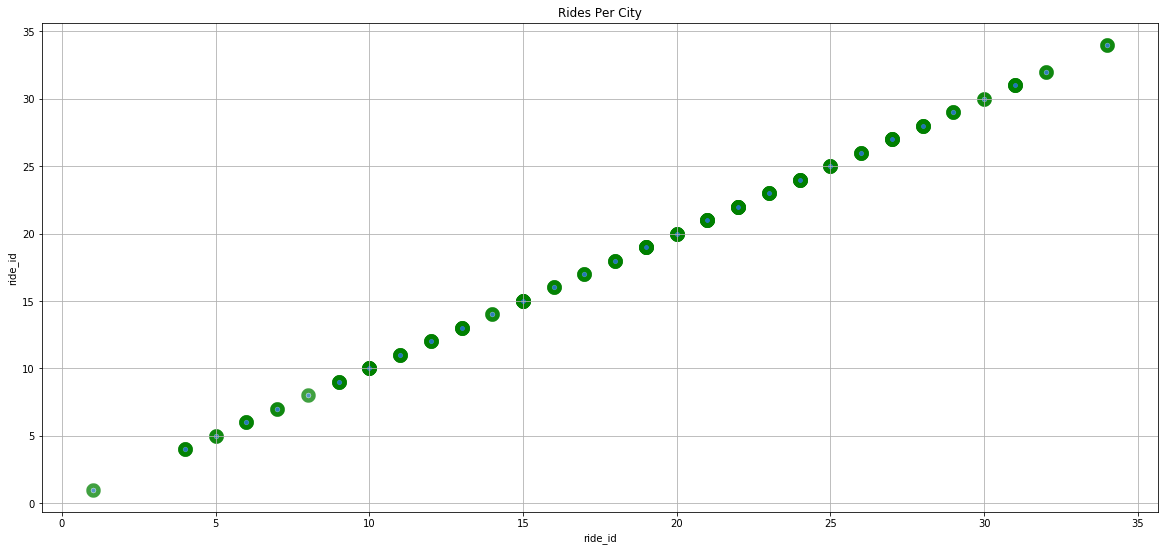

In [25]:
# Creating a scatter plot
totalrides_df.plot(kind="scatter", x="ride_id", y="ride_id",edgecolor='g', alpha=0.75,grid=True,linewidths=10,
                   figsize=(20,9),title="Rides Per City")
plt.show()

In [45]:
# Total Number of Drivers Per City

#grouped by city
grouped_city = city.groupby(['city'])

# Converting a GroupBy object into a Series
totaldrivers = grouped_city['driver_count'].sum()
totaldrivers_df = pd.DataFrame(grouped_city["driver_count"].sum())
totaldrivers_df.head()

,driver_count
city,
Alvarezhaven,21
Alyssaberg,67
Anitamouth,16
Antoniomouth,21
Aprilchester,49


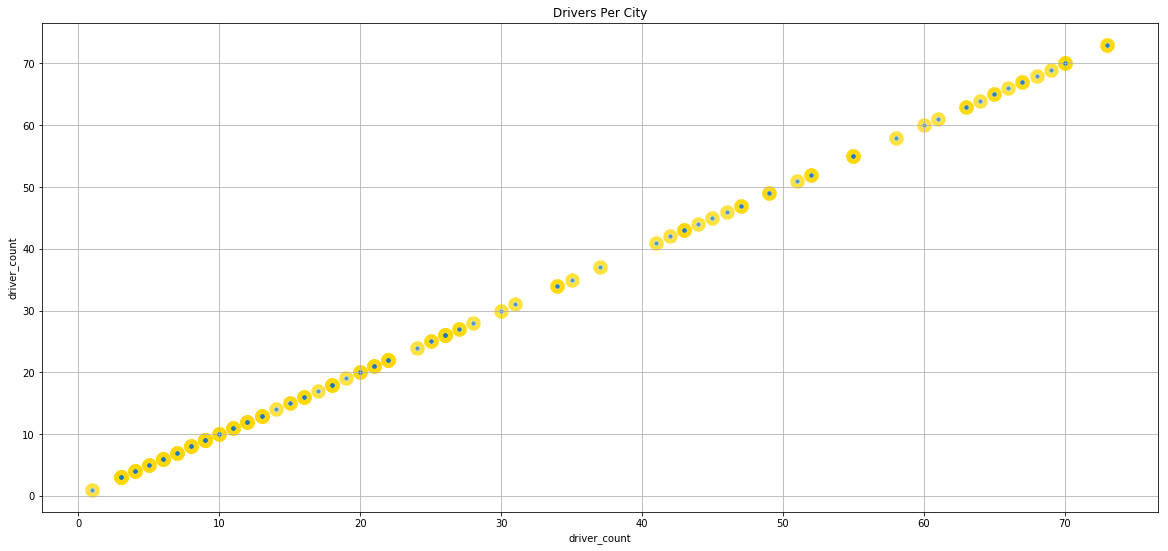

In [46]:

# Creating a scatter plot
totaldrivers_df.plot(kind="scatter", x="driver_count", y="driver_count",edgecolor='gold', alpha=0.75,
                     linewidths=10,grid=True,figsize=(20,9),title="Drivers Per City")

plt.show()

In [19]:
# Grouping by City Type (Urban, Suburban, Rural)

#grouped by city
grouped_city = city.groupby(['type'])

# Converting a GroupBy object into a Series
city_type = grouped_city['city'].count()
city_type_df = pd.DataFrame(grouped_city["city"].count())
city_type_df.head()

,city
type,
Rural,18
Suburban,42
Urban,66


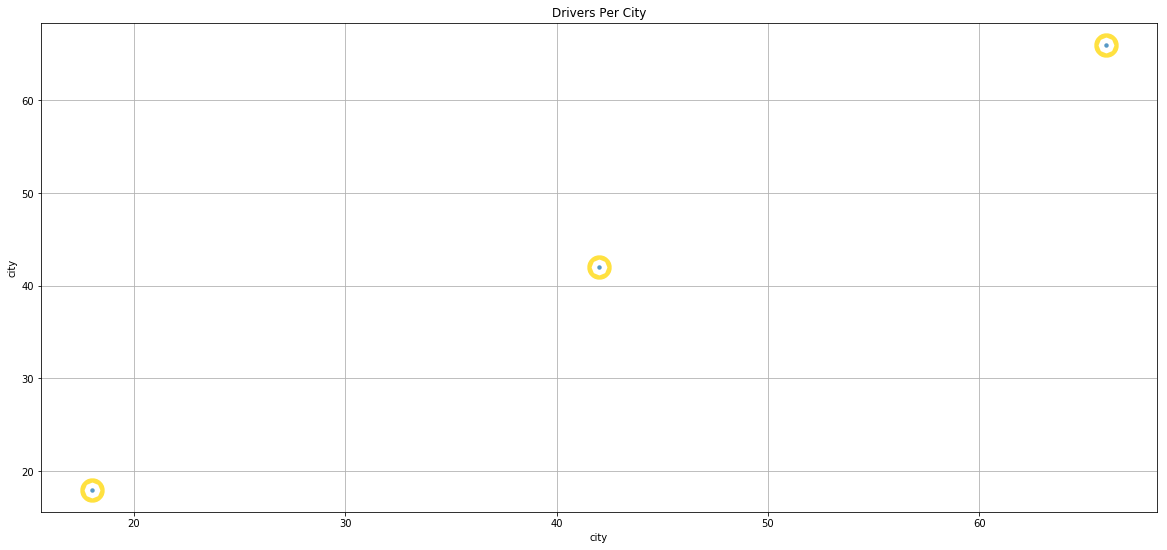

In [36]:
# Creating a scatter plot
city_type_df.plot(kind="scatter", x="city", y="city", edgecolor='gold', alpha=0.75,linewidths=20,grid=True,
                  figsize=(20,9),title="Drivers Per City")

plt.show()

In [10]:
# % of Total Fares by City Type

#grouped by city
grouped_city =combined_data.groupby('type')

# Converting a GroupBy object into a Series
pct_total_fares = grouped_city['fare'].sum()/100
pcttotal_fares = pd.DataFrame(grouped_city["fare"].sum()/100)
pcttotal_fares.round()

,fare
type,
Rural,43.0
Suburban,203.0
Urban,401.0


<class 'matplotlib.axes._subplots.AxesSubplot'>


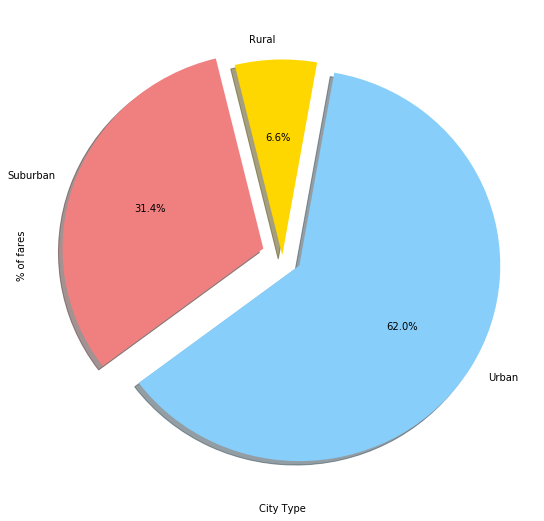

In [11]:
# Creating a pie chart based off of the "pct total drivers" group series.
colors = ['Gold', "lightcoral", "lightskyblue"]
explode = (0,0.1,0.1)
fares_chart = pct_total_fares.plot(kind='pie', figsize=(9, 9),autopct="%1.1f%%",startangle=80,explode=explode,shadow=True,
                                   colors=colors)
print(type(fares_chart))

# Setting the xlabel and ylabel using class methods
#fares_chart.title('% of Total Fares by City Type')
fares_chart.set_xlabel("City Type")
fares_chart.set_ylabel("% of fares")

plt.show()

In [12]:
# % of Total Rides by City Type

#grouped by city
grouped_city =combined_data.groupby(['type'])

# Converting a GroupBy object into a Series
pct_total_rides = grouped_city['ride_id'].count()/100
pcttotal_rides = pd.DataFrame(grouped_city["ride_id"].count()/100)
pcttotal_rides.round()

,ride_id
type,
Rural,1.0
Suburban,7.0
Urban,16.0


<class 'matplotlib.axes._subplots.AxesSubplot'>


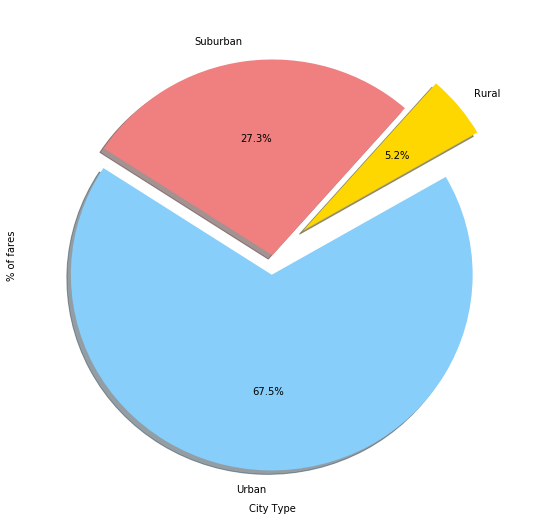

In [13]:
# Creating a pie chart based off of the "pct total rides" group series.
explode = (0.2,0,0.1)
colors = ['Gold', "lightcoral", "lightskyblue"]
rides_chart = pct_total_rides.plot(kind='pie', figsize=(9, 9),autopct="%1.1f%%",startangle=30,explode=explode,shadow=True,
                                   colors=colors)
print(type(rides_chart))

# Setting the xlabel and ylabel using class methods
rides_chart.set_xlabel("City Type")
rides_chart.set_ylabel("% of fares")

plt.show()

In [14]:
# % of Total Drivers by City Type

#grouped by city
grouped_city =combined_data.groupby(['type'])

# Converting a GroupBy object into a Series
pct_total_drivers = grouped_city['driver_count'].count()
pct_total_drivers_df = pd.DataFrame(grouped_city["driver_count"].count()/100)
pct_total_drivers_df

,driver_count
type,
Rural,1.25
Suburban,6.57
Urban,16.25


<class 'matplotlib.axes._subplots.AxesSubplot'>


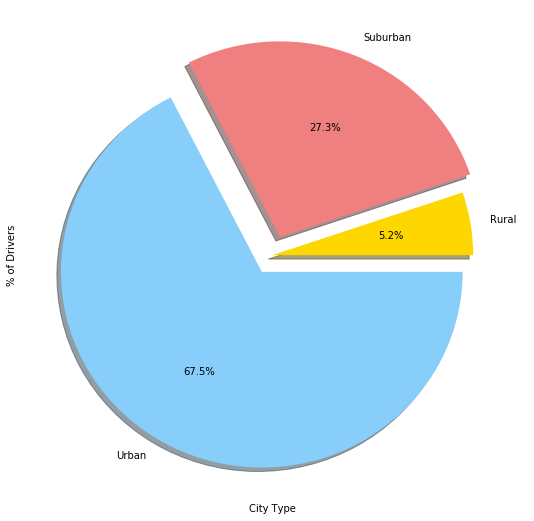

In [15]:
# Creating a pie chart based off of the "pct total drivers" group series.

explode = (0,0.1,0.1)
colors = ['Gold', "lightcoral", "lightskyblue"]
driver_chart = pct_total_drivers.plot(kind='pie', figsize=(9, 9),autopct="%1.1f%%",shadow=True,explode=explode,colors=colors)
print(type(driver_chart))

# Setting the xlabel and ylabel using class methods
driver_chart.set_xlabel("City Type")
driver_chart.set_ylabel("% of Drivers")

plt.show()